In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir('/content/drive/My Drive/School/Time_Series_Analysis/Data/')

['Train_SU63ISt.csv', 'Test_0qrQsBZ.csv']

In [0]:
train = pd.read_csv("/content/drive/My Drive/School/Time_Series_Analysis/Data/Train_SU63ISt.csv")
test = pd.read_csv("/content/drive/My Drive/School/Time_Series_Analysis/Data/Test_0qrQsBZ.csv")

In [0]:
count1 = train['Count']

In [0]:
'train cols', train.columns, 'test cols', test.columns

('train cols',
 Index(['ID', 'Datetime', 'Count'], dtype='object'),
 'test cols',
 Index(['ID', 'Datetime'], dtype='object'))

In [0]:
'train shape', train.shape, 'test shape', test.shape

('train shape', (18288, 3), 'test shape', (5112, 2))

In [0]:
train.isnull().values.any()

False

***Make copy of Original***

In [0]:
train_original = train.copy()
test_original = test.copy()

In [0]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [0]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [0]:
train.shape, test.shape

((18288, 3), (5112, 2))

***Extract Features from Time***

In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [0]:
for i in (train, test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [0]:
train['Day of week'] = train['Datetime'].dt.dayofweek

In [0]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
train['weekend'] = train['Datetime'].apply(applyer)

No handles with labels found to put in legend.


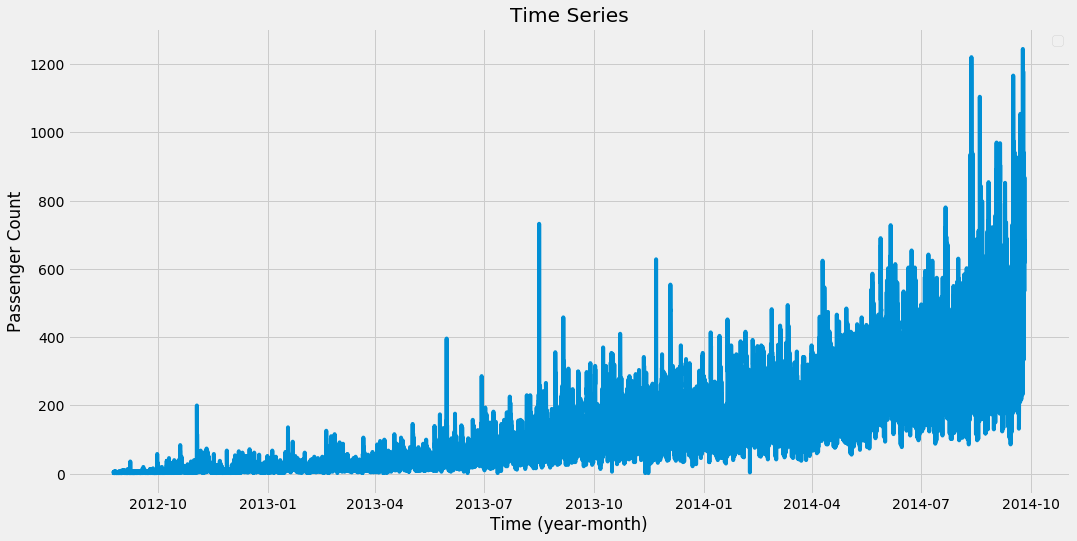

In [0]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

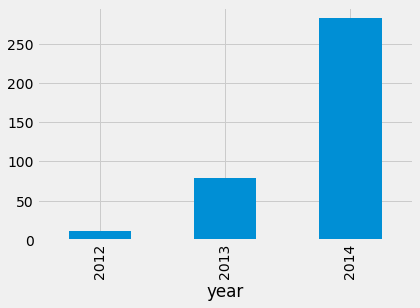

In [0]:
train.groupby('year')['Count'].mean().plot.bar()

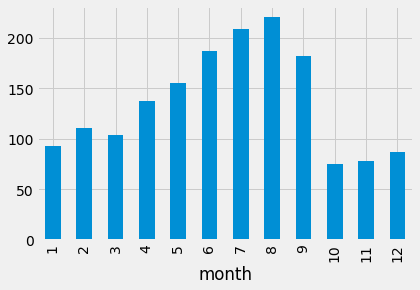

In [0]:
train.groupby('month')['Count'].mean().plot.bar()

In [0]:
temp = train.groupby(['year', 'month'])['Count'].mean()

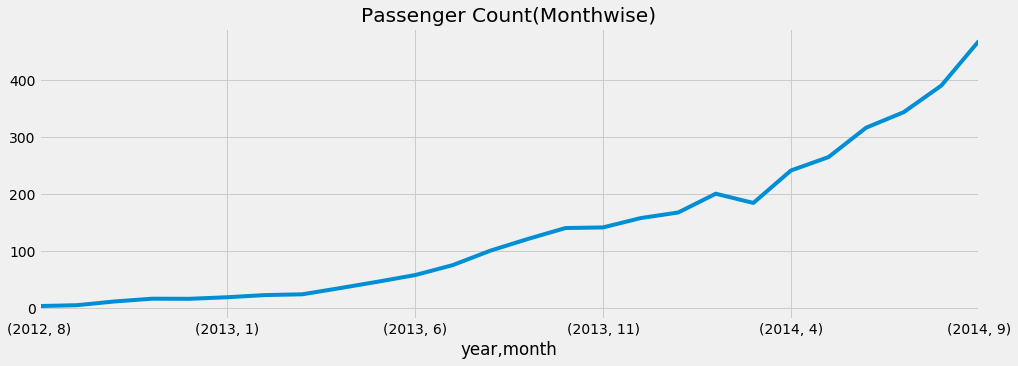

In [0]:
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)

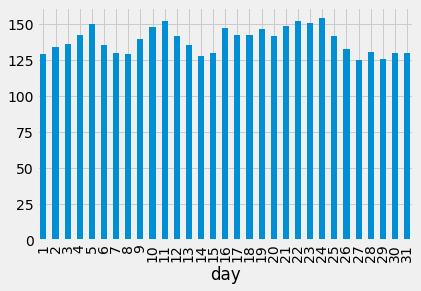

In [0]:
train.groupby('day') ['Count'].mean().plot.bar()

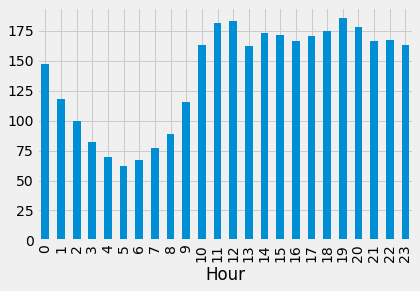

In [0]:
train.groupby('Hour')['Count'].mean().plot.bar()

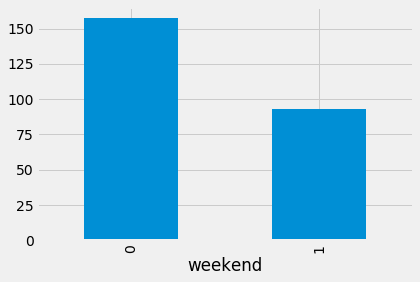

In [0]:
train.groupby('weekend') ['Count'].mean().plot.bar()

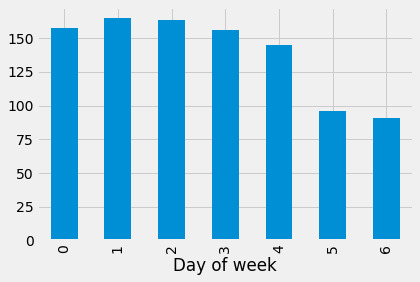

In [0]:
train.groupby('Day of week') ['Count'].mean().plot.bar()

In [0]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

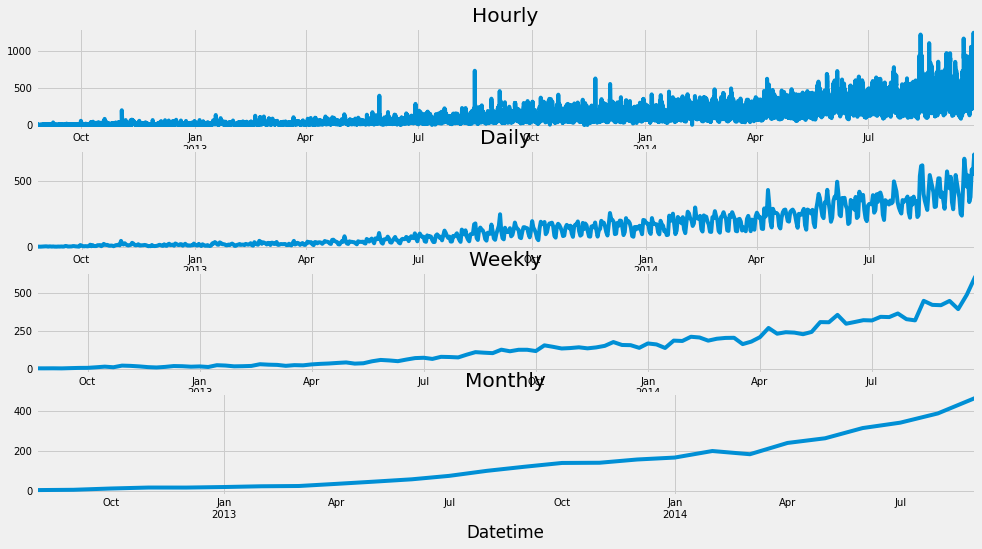

In [0]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 10, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 10, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 10, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 10, ax = axs[3])

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

***Divide data into training and validation***

In [0]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

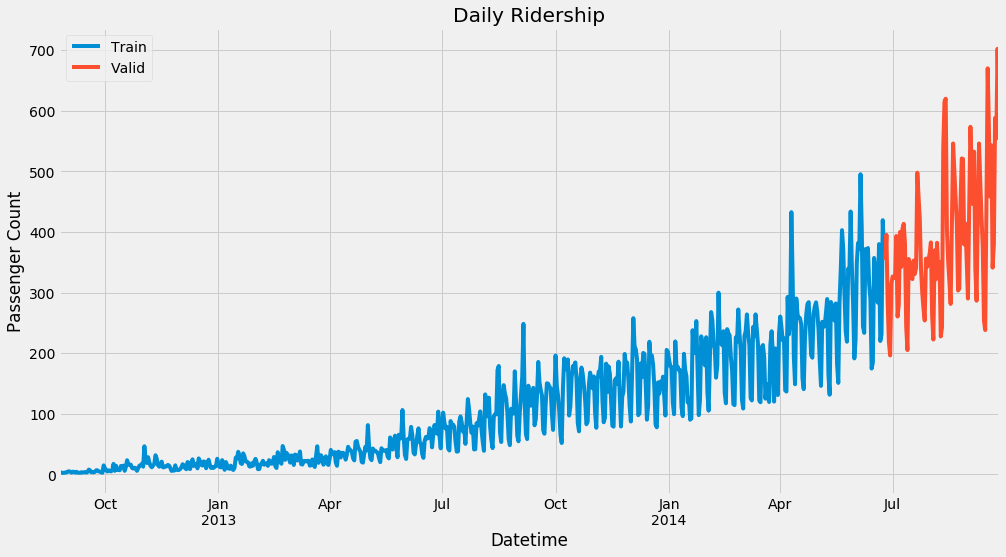

In [0]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

** Naive Approach**

Text(0.5, 1.0, 'Naive Forecast')

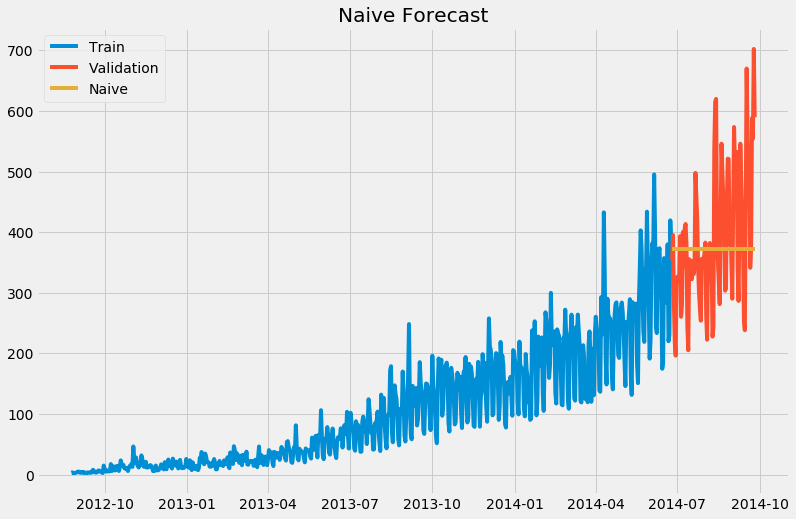

In [0]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'],  label = 'Train')
plt.plot(valid.index, valid['Count'],  label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

*** Calculate RMS Error for Naive Approach***

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rmse

111.79050467496724

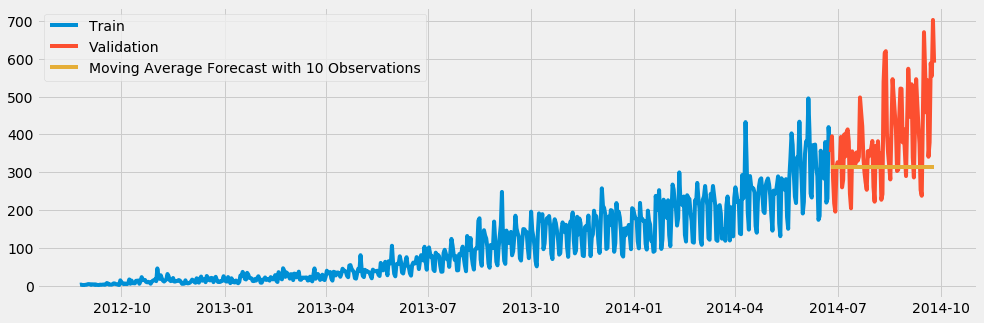

In [0]:
y_hat_avg = valid.copy()


y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]



plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()


***RMS Error for Moving Average***

In [0]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse

134.23733308950264

Text(0, 0.5, 'RMSE')

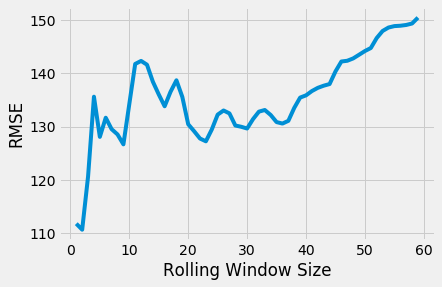

In [0]:
maxDays = 365
summaryArray = np.zeros([maxDays, 2])
for j in range (1,maxDays):

    rmse = 0
    y_hat_avg = valid.copy()
    y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(j).mean().iloc[-1] #rolling arg is how many days to look back on to forecast
    rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
    #print(j,rmse)
    summaryArray[j,:] = [j,rmse]


plt.plot(summaryArray[1:60,0], summaryArray[1:60,1])
plt.xlabel('Rolling Window Size')
plt.ylabel('RMSE')

***Simple Exponential Smoothing***

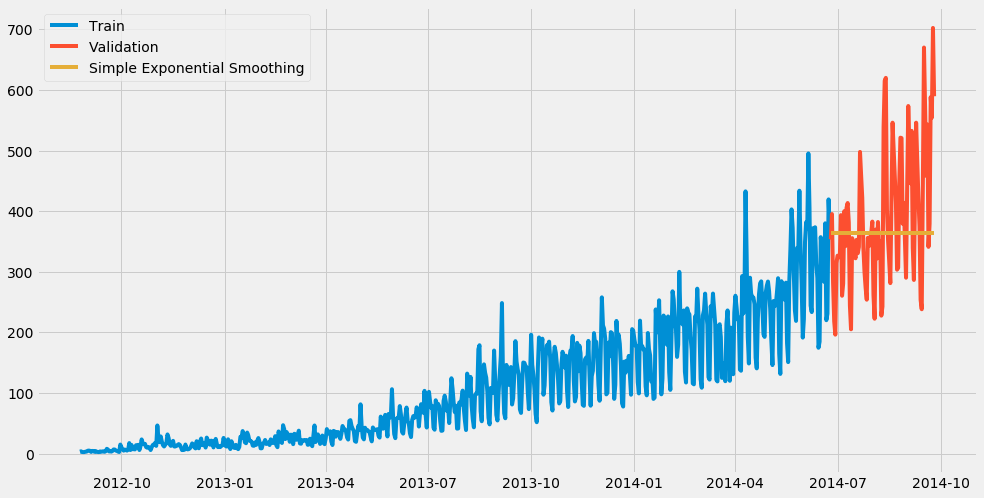

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing

y_hat = valid.copy()

fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6,optimized = False)

y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

***RMSE Error for Simple Exponential Smoothing***

In [0]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat['SES']))
rmse

113.43708111884514

convolving smoothing

In [0]:
import numpy
from numpy import *

In [0]:
def smooth(x, window_len=11):

        s = np.r_[x[window_len -1:0:-1], x, x[-2:window_len-1:-1]]

        w = np.ones(window_len, 'd')

        w = w/w.sum()

        y=np.convolve(w,s, mode='valid')

        return y

In [0]:
t = np.linspace(-4,4,100)

In [0]:
x = np.sin(t)

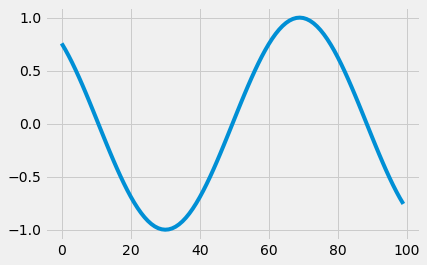

In [0]:
plt.plot(x)

In [0]:
x

array([ 0.7568025 ,  0.70157068,  0.64176014,  0.57776122,  0.5099916 ,
        0.43889357,  0.36493116,  0.28858706,  0.21035953,  0.1307591 ,
        0.0503053 , -0.03047682, -0.11106004, -0.19091843, -0.26953082,
       -0.34638414, -0.42097682, -0.49282204, -0.56145091, -0.62641554,
       -0.68729192, -0.74368277, -0.79522006, -0.84156742, -0.88242239,
       -0.91751832, -0.94662616, -0.96955595, -0.98615803, -0.99632407,
       -0.99998769, -0.99712501, -0.98775469, -0.9719379 , -0.94977786,
       -0.9214192 , -0.88704699, -0.84688556, -0.80119703, -0.75027957,
       -0.69446549, -0.63411905, -0.56963411, -0.5014315 , -0.42995636,
       -0.35567516, -0.27907268, -0.20064886, -0.12091552, -0.04039305,
        0.04039305,  0.12091552,  0.20064886,  0.27907268,  0.35567516,
        0.42995636,  0.5014315 ,  0.56963411,  0.63411905,  0.69446549,
        0.75027957,  0.80119703,  0.84688556,  0.88704699,  0.9214192 ,
        0.94977786,  0.9719379 ,  0.98775469,  0.99712501,  0.99

In [0]:
xn =  x + 0.1 * np.random.randn(len(x))

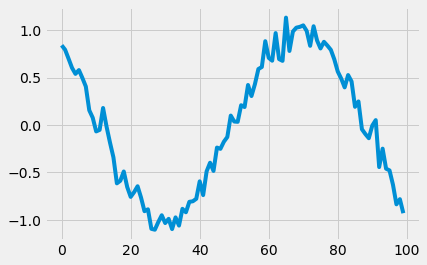

In [0]:
plt.plot(xn)

In [0]:
w = np.ones(10, 'd')

In [0]:
w = w/w.sum()

In [0]:
y = np.convolve(w, xn)

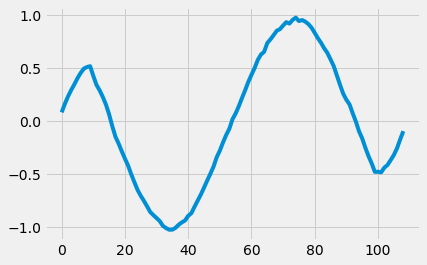

In [0]:
plt.plot(y)

In [0]:
w = np.ones(3, 'd')
w = w/w.sum()
w

array([0.33333333, 0.33333333, 0.33333333])

In [0]:
# y = np.zeros((len(xn)))
# for i in range(1, len(xn)-1):
#     y[i] = (np.multiply(xn[i-1],w[0])) + (np.multiply(xn[i],[1])) + (np.multiply(xn[i+1],w[2]))
    

In [0]:
# y.shape

In [0]:
# plt.plot(xn, 'r')
# plt.plot(y)

In [0]:
win_size=5
w = np.ones(5)/5

In [0]:
y = np.zeros(len(xn))

In [0]:
for i in range(int((win_size-1)/2), len(xn)-(int((win_size-1)/2))):
   y[i] =  np.sum(w * (xn[i - int((win_size-1)/2) : i + int((win_size-1)/2)+1]))   

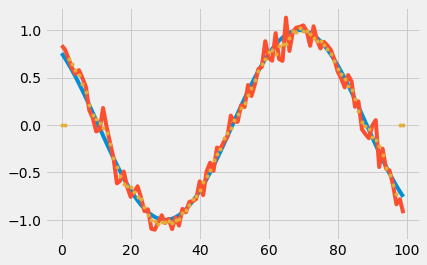

In [0]:
plt.plot(x)
plt.plot(xn)
plt.plot(y, '.')

In [0]:
win_size=5

w = np.ones(win_size)/win_size

y = np.zeros(len(xn))

In [0]:
for i in range(int((win_size-1)/2), len(xn)-(int((win_size-1)/2))):
   y[i] =  xn[i-2] * w[0] + xn[i-1] * w[1] + xn[i] * w[2] + xn[i+1] * w[3] + xn[i+2] * w[4]

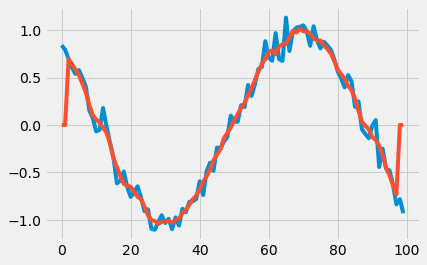

In [0]:
# plt.plot(x)
plt.plot(xn)
plt.plot(y)

In [0]:
win_size=7

w = np.ones(win_size)/win_size

y = np.zeros(len(xn))

In [0]:
a = int((win_size-1)/2)

for i in range(a, len(xn)-a):
    xi = xn[ i-a : i + a +1] #make window
    y[i] =  np.sum(w*xi)

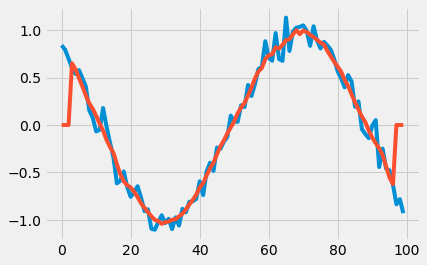

In [0]:
# plt.plot(x)
plt.plot(xn)
plt.plot(y)

In [0]:
win_size=7

w = np.ones(win_size)/win_size

y = np.zeros(len(xn))

In [0]:
a = int((win_size-1)/2)

for i in range(a, len(xn)-a):
    xi = xn[ i-a : i + a +1] #make window
    y[i] =  np.dot(w,xi)

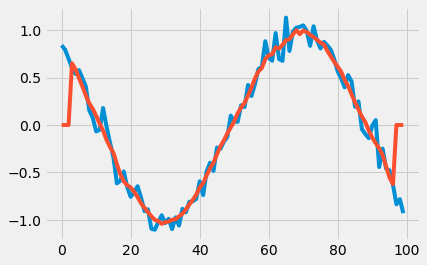

In [0]:
# plt.plot(x)
plt.plot(xn)
plt.plot(y)

In [0]:
xn = xn[...,None]

In [0]:
xn.shape

(100, 1)

In [0]:
from skimage.util.shape import view_as_windows as vaw

In [0]:
window_shape = (7,1)

In [0]:
xw = vaw(xn, window_shape)

In [0]:
xw.shape

(94, 1, 7, 1)

In [0]:
xw = xw.squeeze()

In [0]:
xw.shape

(94, 7)

In [0]:
w.shape

(7,)

In [0]:
#broadcasting
xw2 = w*xw
(w*xw).shape

(94, 7)

In [0]:
y = np.sum(xw2, 1)
yd = np.dot(xw, w)

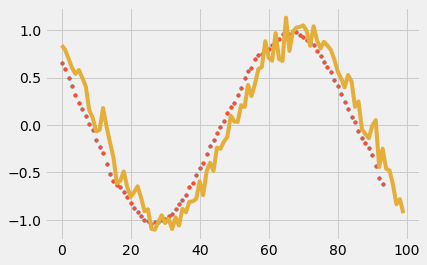

In [0]:
plt.plot(yd, '.')
plt.plot(y, '.')
plt.plot(xn)

>- albert michelson's harmonic analyzer intro/history
- fourier transformations
>>- dot product of 1 = same direction, 0 = right angle, -1 = oposite directions, need them to be at 0 so fux are at right angels and can be seperated into parts
>>- function space, recording is dot in n dim space
>>- dot product of point with direction looking at, to give coefficient in that direction
>>- signal fux dot product with k-space (fourier domain) to get matrix of coefficients (spectrum) = analysis
>>- transpose k-space and multiple by analysis matrices to get original signal without noise (high freq assumption)

In [0]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

In [0]:
y = np.sin(x)

In [0]:
y2 = np.sin(2*x)

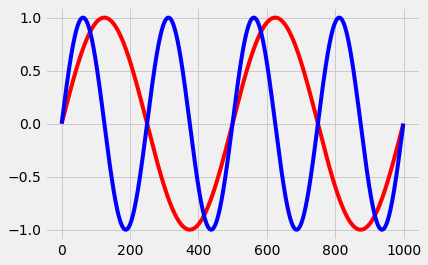

In [0]:
plt.plot(y, 'r')
plt.plot(y2, 'b')

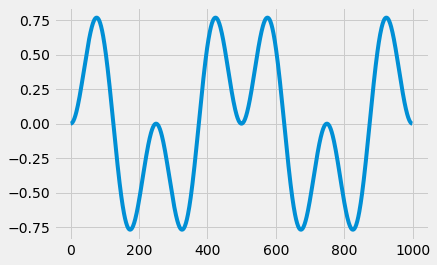

In [0]:
plt.plot(y*y2)

In [0]:
np.sum(y*y2) #this is basically zero

2.1316282072803006e-14

In [0]:
x = np.linspace(0,1000,1000)
y = np.cos(150*3.14159*x) #this is the signal function
ys = y.shape[0]

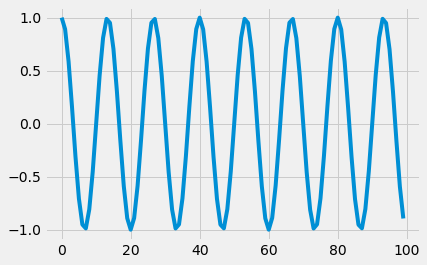

In [0]:
plt.plot(y[0:100])

In [0]:
F = np.zeros((1000,1000))

In [0]:
for i in range(ys): #we are making the fourier matrix
    F[i,:] = np.cos(i*3.14159*x/ys) 

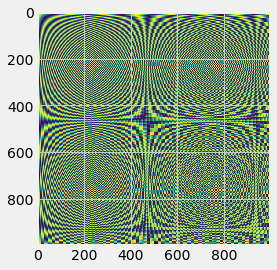

In [0]:
plt.imshow(F)

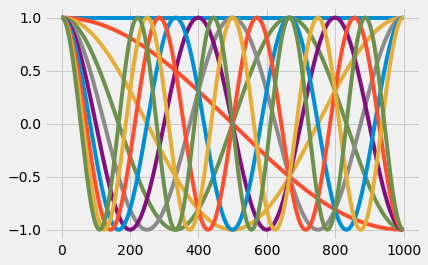

In [0]:
plt.plot(F[0:10,:].T);

In [0]:
y.shape,F.shape

((1000,), (1000, 1000))

In [0]:
fy = np.matmul(F,y)

In [0]:
fy = fy / (1000/2) #length of signal halved b/c math

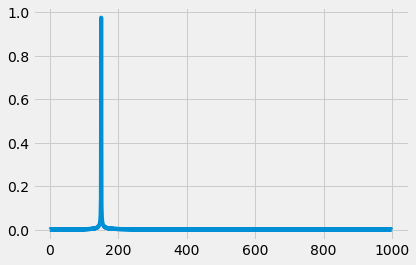

In [0]:
plt.plot(np.abs(fy))

In [0]:
np.argmax(np.abs(fy))

150

In [0]:
y2 = np.matmul(F.T,fy)

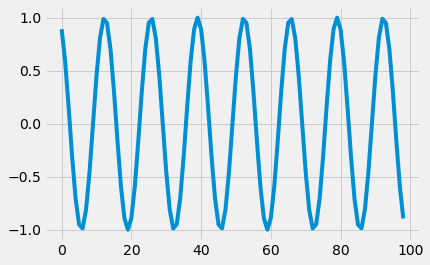

In [0]:
plt.plot(y2[1:100])

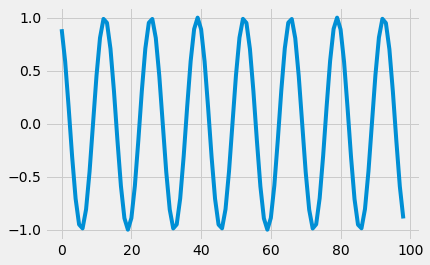

In [0]:
plt.plot(y[1:100])

In [0]:
x = np.linspace(0,1000,1000)
n = 0.2*np.random.randn(y.shape[0],)
y = np.cos(150*3.14159*x)
yn = y + n
ys = n.shape[0]

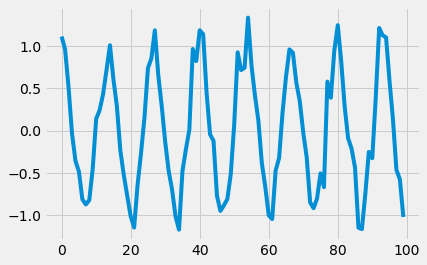

In [0]:
plt.plot(yn[0:100])

In [0]:
fy = np.matmul(F,yn)

In [0]:
fy = fy / (1000/2)

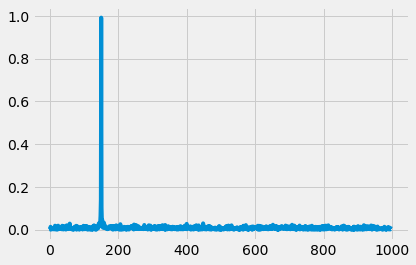

In [0]:
plt.plot(np.abs(fy))

In [0]:
np.where(fy > 0.5)

(array([150]),)

In [0]:
np.where(fy < 0.5)

In [0]:
fy[np.where(fy < 0.5)] = 0 

In [0]:
y2 = np.matmul(F.T,fy)

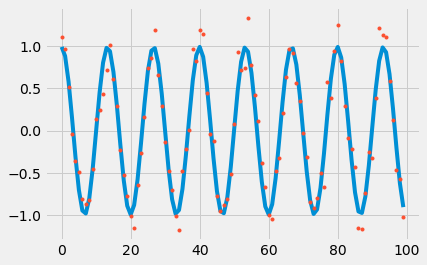

In [0]:
plt.plot(y2[0:100])
plt.plot(yn[0:100], '.')

>-fourier with convolution
- inverse function of fourier of signal times fouoreir of weights 
- multiplication in k-space is the same as convolusion in regular space = convolutional theorem

In [0]:
x = np.linspace(-2*np.pi,2*np.pi,101)

In [0]:
y = np.sin(x)

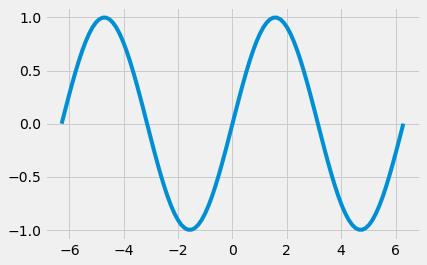

In [0]:
plt.plot(x,y)

In [0]:
n = 0.1*np.random.randn(y.shape[0],)

In [0]:
yn = y + n 

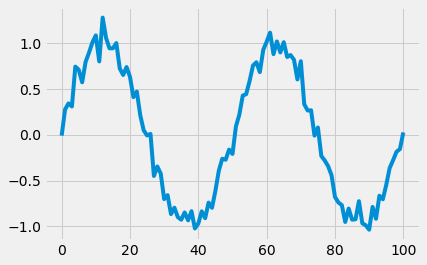

In [0]:
plt.plot(yn)

In [0]:
w = np.ones(5,)
w = w / 5

In [0]:
np.fft.fft(w)

array([ 1.00000000e+00+0.j,  0.00000000e+00+0.j, -2.77555756e-17+0.j,
       -2.77555756e-17+0.j,  0.00000000e+00+0.j])

In [0]:
w.shape, yn.shape

((5,), (101,))

In [0]:
s = yn.shape[0]
ws = w.shape[0]

In [0]:
range((s-1)//2 - (ws-1)//2 , (s-1)//2 + (ws-1)//2)

range(48, 52)

In [0]:
z = np.zeros(101,)

In [0]:
z[(s-1)//2 - (ws-1)//2 : (s-1)//2 + (ws-1)//2+1] = w

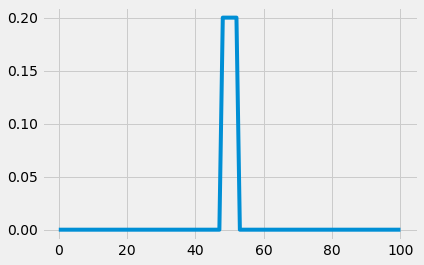

In [0]:
plt.plot(z)

In [0]:
fz = np.fft.fft(z)

In [0]:
fyn = np.fft.fft(yn)

In [0]:
y2= np.fft.ifft(fz*fyn)

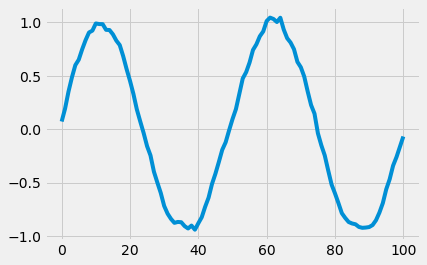

In [0]:
plt.plot(y2)

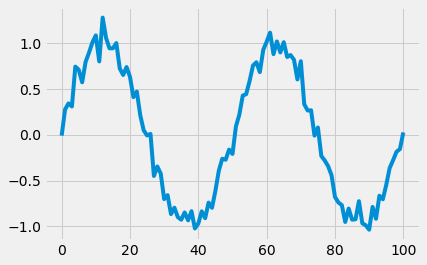

In [0]:
plt.plot(yn)